<a href="https://colab.research.google.com/github/Bansisonani/AI-Assignment/blob/main/machine_learning_py_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)

Training model with SIGMOID activation...



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2243 - loss: 2.1157 - val_accuracy: 0.6426 - val_loss: 1.0673
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6850 - loss: 0.9404 - val_accuracy: 0.8249 - val_loss: 0.6249
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8381 - loss: 0.5650 - val_accuracy: 0.9066 - val_loss: 0.4011
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9170 - loss: 0.3515 - val_accuracy: 0.9344 - val_loss: 0.2693
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9407 - loss: 0.2516 - val_accuracy: 0.9431 - val_loss: 0.2314
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9514 - loss: 0.2022 - val_accuracy: 0.9513 - val_loss: 0.1965
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9603 - loss: 0.1634 - val_accuracy: 0.9558 - val_loss: 0.1757
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9649 - loss: 0.1484 - val_accuracy:

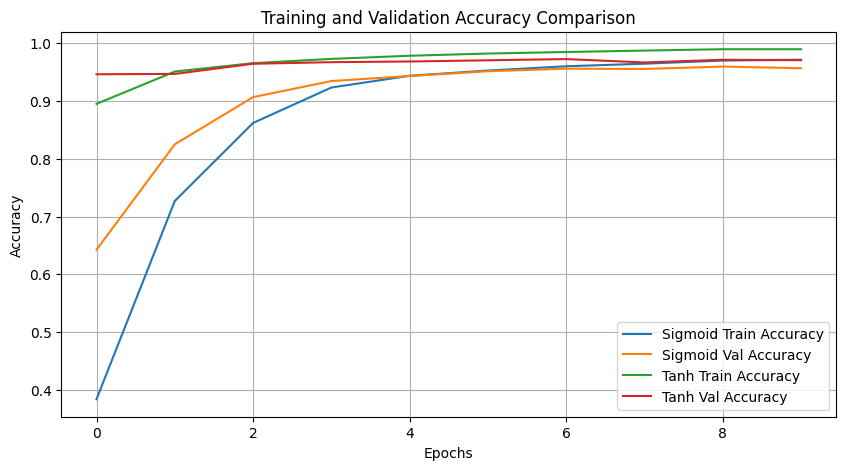

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


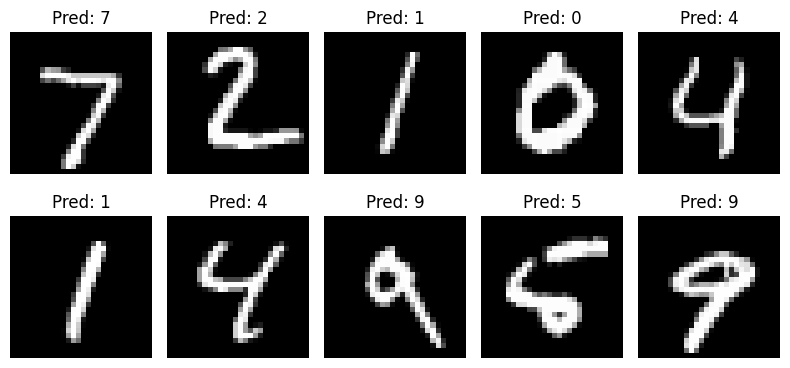

In [1]:
# Task 1: MNIST Image Classification
# Artificial Intelligence and Neural Networks

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data preprocessing
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Function to build neural network model
def build_model(activation_function):
    model = Sequential()

    # Input layer
    model.add(Flatten(input_shape=(28, 28)))

    # Six hidden layers
    model.add(Dense(128, activation=activation_function))
    model.add(Dense(128, activation=activation_function))
    model.add(Dense(128, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(32, activation=activation_function))

    # Output layer (Softmax for probability distribution)
    model.add(Dense(10, activation="softmax"))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Model 1: Sigmoid Activation Function
print("\nTraining model with SIGMOID activation...\n")

sigmoid_model = build_model("sigmoid")

sigmoid_history = sigmoid_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

sigmoid_loss, sigmoid_accuracy = sigmoid_model.evaluate(
    X_test, y_test_cat, verbose=0
)

print(f"Sigmoid Model Test Accuracy: {sigmoid_accuracy:.4f}")

# Model 2: Tanh Activation Function
print("\nTraining model with TANH activation...\n")

tanh_model = build_model("tanh")

tanh_history = tanh_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

tanh_loss, tanh_accuracy = tanh_model.evaluate(
    X_test, y_test_cat, verbose=0
)

print(f"Tanh Model Test Accuracy: {tanh_accuracy:.4f}")

# Accuracy comparison
print("\n===== Model Comparison =====")
print(f"Sigmoid Accuracy: {sigmoid_accuracy:.4f}")
print(f"Tanh Accuracy:    {tanh_accuracy:.4f}")

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))

plt.plot(sigmoid_history.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(sigmoid_history.history['val_accuracy'], label='Sigmoid Val Accuracy')

plt.plot(tanh_history.history['accuracy'], label='Tanh Train Accuracy')
plt.plot(tanh_history.history['val_accuracy'], label='Tanh Val Accuracy')

plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Sample prediction visualization
plt.figure(figsize=(8, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    pred = np.argmax(tanh_model.predict(X_test[i].reshape(1, 28, 28)))
    plt.title(f"Pred: {pred}")

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

# Save training and test data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("MNIST dataset saved as .npy files")


MNIST dataset saved as .npy files
